# Martingales: Theory and Simulation

## 1. Introduction

A **martingale** is a fundamental concept in probability theory and stochastic processes, with profound applications in mathematical finance, gambling theory, and statistical inference. The term originated from a class of betting strategies in 18th-century France.

## 2. Mathematical Definition

### 2.1 Formal Definition

Let $(\Omega, \mathcal{F}, P)$ be a probability space and let $\{\mathcal{F}_n\}_{n \geq 0}$ be a **filtration** (an increasing sequence of $\sigma$-algebras). A sequence of random variables $\{X_n\}_{n \geq 0}$ is called a **martingale** with respect to the filtration $\{\mathcal{F}_n\}$ if:

1. **Adaptedness:** $X_n$ is $\mathcal{F}_n$-measurable for all $n \geq 0$
2. **Integrability:** $E[|X_n|] < \infty$ for all $n \geq 0$
3. **Martingale Property:** 
$$E[X_{n+1} | \mathcal{F}_n] = X_n \quad \text{almost surely}$$

### 2.2 Intuitive Interpretation

The martingale property states that the **best prediction** for the future value $X_{n+1}$, given all information up to time $n$, is simply the current value $X_n$. In other words, a martingale represents a "fair game" where, on average, you neither gain nor lose.

### 2.3 Related Concepts

- **Submartingale:** $E[X_{n+1} | \mathcal{F}_n] \geq X_n$ (tendency to increase)
- **Supermartingale:** $E[X_{n+1} | \mathcal{F}_n] \leq X_n$ (tendency to decrease)

## 3. Classical Examples of Martingales

### 3.1 Simple Random Walk

Let $\{Z_i\}_{i \geq 1}$ be i.i.d. random variables with $P(Z_i = 1) = P(Z_i = -1) = \frac{1}{2}$.

Define the **simple random walk**:
$$S_n = \sum_{i=1}^{n} Z_i, \quad S_0 = 0$$

Then $\{S_n\}$ is a martingale since:
$$E[S_{n+1} | \mathcal{F}_n] = E[S_n + Z_{n+1} | \mathcal{F}_n] = S_n + E[Z_{n+1}] = S_n + 0 = S_n$$

### 3.2 Exponential Martingale

For the same random walk, define:
$$M_n = e^{\theta S_n - n \psi(\theta)}$$

where $\psi(\theta) = \log E[e^{\theta Z_1}] = \log\cosh(\theta)$ is the cumulant generating function.

This $\{M_n\}$ is also a martingale, crucial in large deviation theory.

### 3.3 Doob's Martingale

Given any integrable random variable $Y$ and filtration $\{\mathcal{F}_n\}$, the sequence:
$$X_n = E[Y | \mathcal{F}_n]$$

forms a martingale. This is the canonical way to construct martingales.

## 4. Key Theorems

### 4.1 Doob's Optional Stopping Theorem

If $\{X_n\}$ is a martingale and $\tau$ is a bounded stopping time, then:
$$E[X_\tau] = E[X_0]$$

This theorem explains why no betting strategy can beat a fair game.

### 4.2 Martingale Convergence Theorem

If $\{X_n\}$ is a martingale bounded in $L^1$ (i.e., $\sup_n E[|X_n|] < \infty$), then $X_n$ converges almost surely to some limit $X_\infty$.

### 4.3 Doob's Maximal Inequality

For a non-negative submartingale $\{X_n\}$ and any $\lambda > 0$:
$$P\left(\max_{0 \leq k \leq n} X_k \geq \lambda\right) \leq \frac{E[X_n]}{\lambda}$$

## 5. Numerical Simulations

We will now implement and visualize several martingale processes to illustrate the theoretical concepts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Plotting style
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [2]:
def simple_random_walk(n_steps, n_paths=1):
    """
    Generate simple symmetric random walk paths.
    
    Parameters:
    -----------
    n_steps : int
        Number of time steps
    n_paths : int
        Number of independent paths to generate
    
    Returns:
    --------
    paths : ndarray of shape (n_paths, n_steps + 1)
        Random walk paths starting at 0
    """
    # Generate increments: +1 or -1 with equal probability
    increments = 2 * np.random.randint(0, 2, size=(n_paths, n_steps)) - 1
    
    # Cumulative sum to get the walk, prepend 0 for initial position
    paths = np.zeros((n_paths, n_steps + 1))
    paths[:, 1:] = np.cumsum(increments, axis=1)
    
    return paths


def exponential_martingale(random_walk_paths, theta=0.5):
    """
    Compute the exponential martingale M_n = exp(theta * S_n - n * psi(theta))
    where psi(theta) = log(cosh(theta)).
    
    Parameters:
    -----------
    random_walk_paths : ndarray
        Simple random walk paths
    theta : float
        Parameter for the exponential martingale
    
    Returns:
    --------
    martingale : ndarray
        Exponential martingale values
    """
    n_paths, n_steps_plus_1 = random_walk_paths.shape
    n = np.arange(n_steps_plus_1)
    
    # Cumulant generating function for symmetric random walk
    psi_theta = np.log(np.cosh(theta))
    
    # Compute exponential martingale
    martingale = np.exp(theta * random_walk_paths - n * psi_theta)
    
    return martingale


def verify_martingale_property(paths, name="Process"):
    """
    Verify the martingale property by checking E[X_{n+1} | X_n] ≈ X_n.
    We use the sample mean as an estimator.
    
    Parameters:
    -----------
    paths : ndarray
        Simulated paths of the process
    name : str
        Name of the process for display
    """
    n_paths = paths.shape[0]
    
    # Compare E[X_{n+1}] with E[X_n] at various time points
    time_points = [10, 50, 100, 200]
    
    print(f"\n--- Martingale Verification for {name} ---")
    print(f"Number of paths: {n_paths}")
    print(f"{'Time n':<10} {'E[X_n]':<15} {'E[X_{n+1}]':<15} {'Difference':<15}")
    print("-" * 55)
    
    for n in time_points:
        if n + 1 < paths.shape[1]:
            mean_xn = np.mean(paths[:, n])
            mean_xn1 = np.mean(paths[:, n + 1])
            diff = mean_xn1 - mean_xn
            print(f"{n:<10} {mean_xn:<15.6f} {mean_xn1:<15.6f} {diff:<15.6f}")

In [3]:
# Simulation parameters
n_steps = 500
n_paths = 1000

# Generate random walk paths
rw_paths = simple_random_walk(n_steps, n_paths)

# Generate exponential martingale
theta = 0.3
exp_mart_paths = exponential_martingale(rw_paths, theta)

print("Simulations completed.")
print(f"Random walk paths shape: {rw_paths.shape}")
print(f"Exponential martingale paths shape: {exp_mart_paths.shape}")

Simulations completed.
Random walk paths shape: (1000, 501)
Exponential martingale paths shape: (1000, 501)


In [4]:
# Verify martingale property for both processes
verify_martingale_property(rw_paths, "Simple Random Walk")
verify_martingale_property(exp_mart_paths, "Exponential Martingale")


--- Martingale Verification for Simple Random Walk ---
Number of paths: 1000
Time n     E[X_n]          E[X_{n+1}]      Difference     
-------------------------------------------------------
10         -0.170000       -0.216000       -0.046000      
50         -0.206000       -0.200000       0.006000       
100        -0.408000       -0.426000       -0.018000      
200        0.072000        0.082000        0.010000       

--- Martingale Verification for Exponential Martingale ---
Number of paths: 1000
Time n     E[X_n]          E[X_{n+1}]      Difference     
-------------------------------------------------------
10         1.006490        1.001265        -0.005225      
50         1.043419        1.076987        0.033568       
100        0.387837        0.347287        -0.040550      
200        0.177742        0.194946        0.017204       


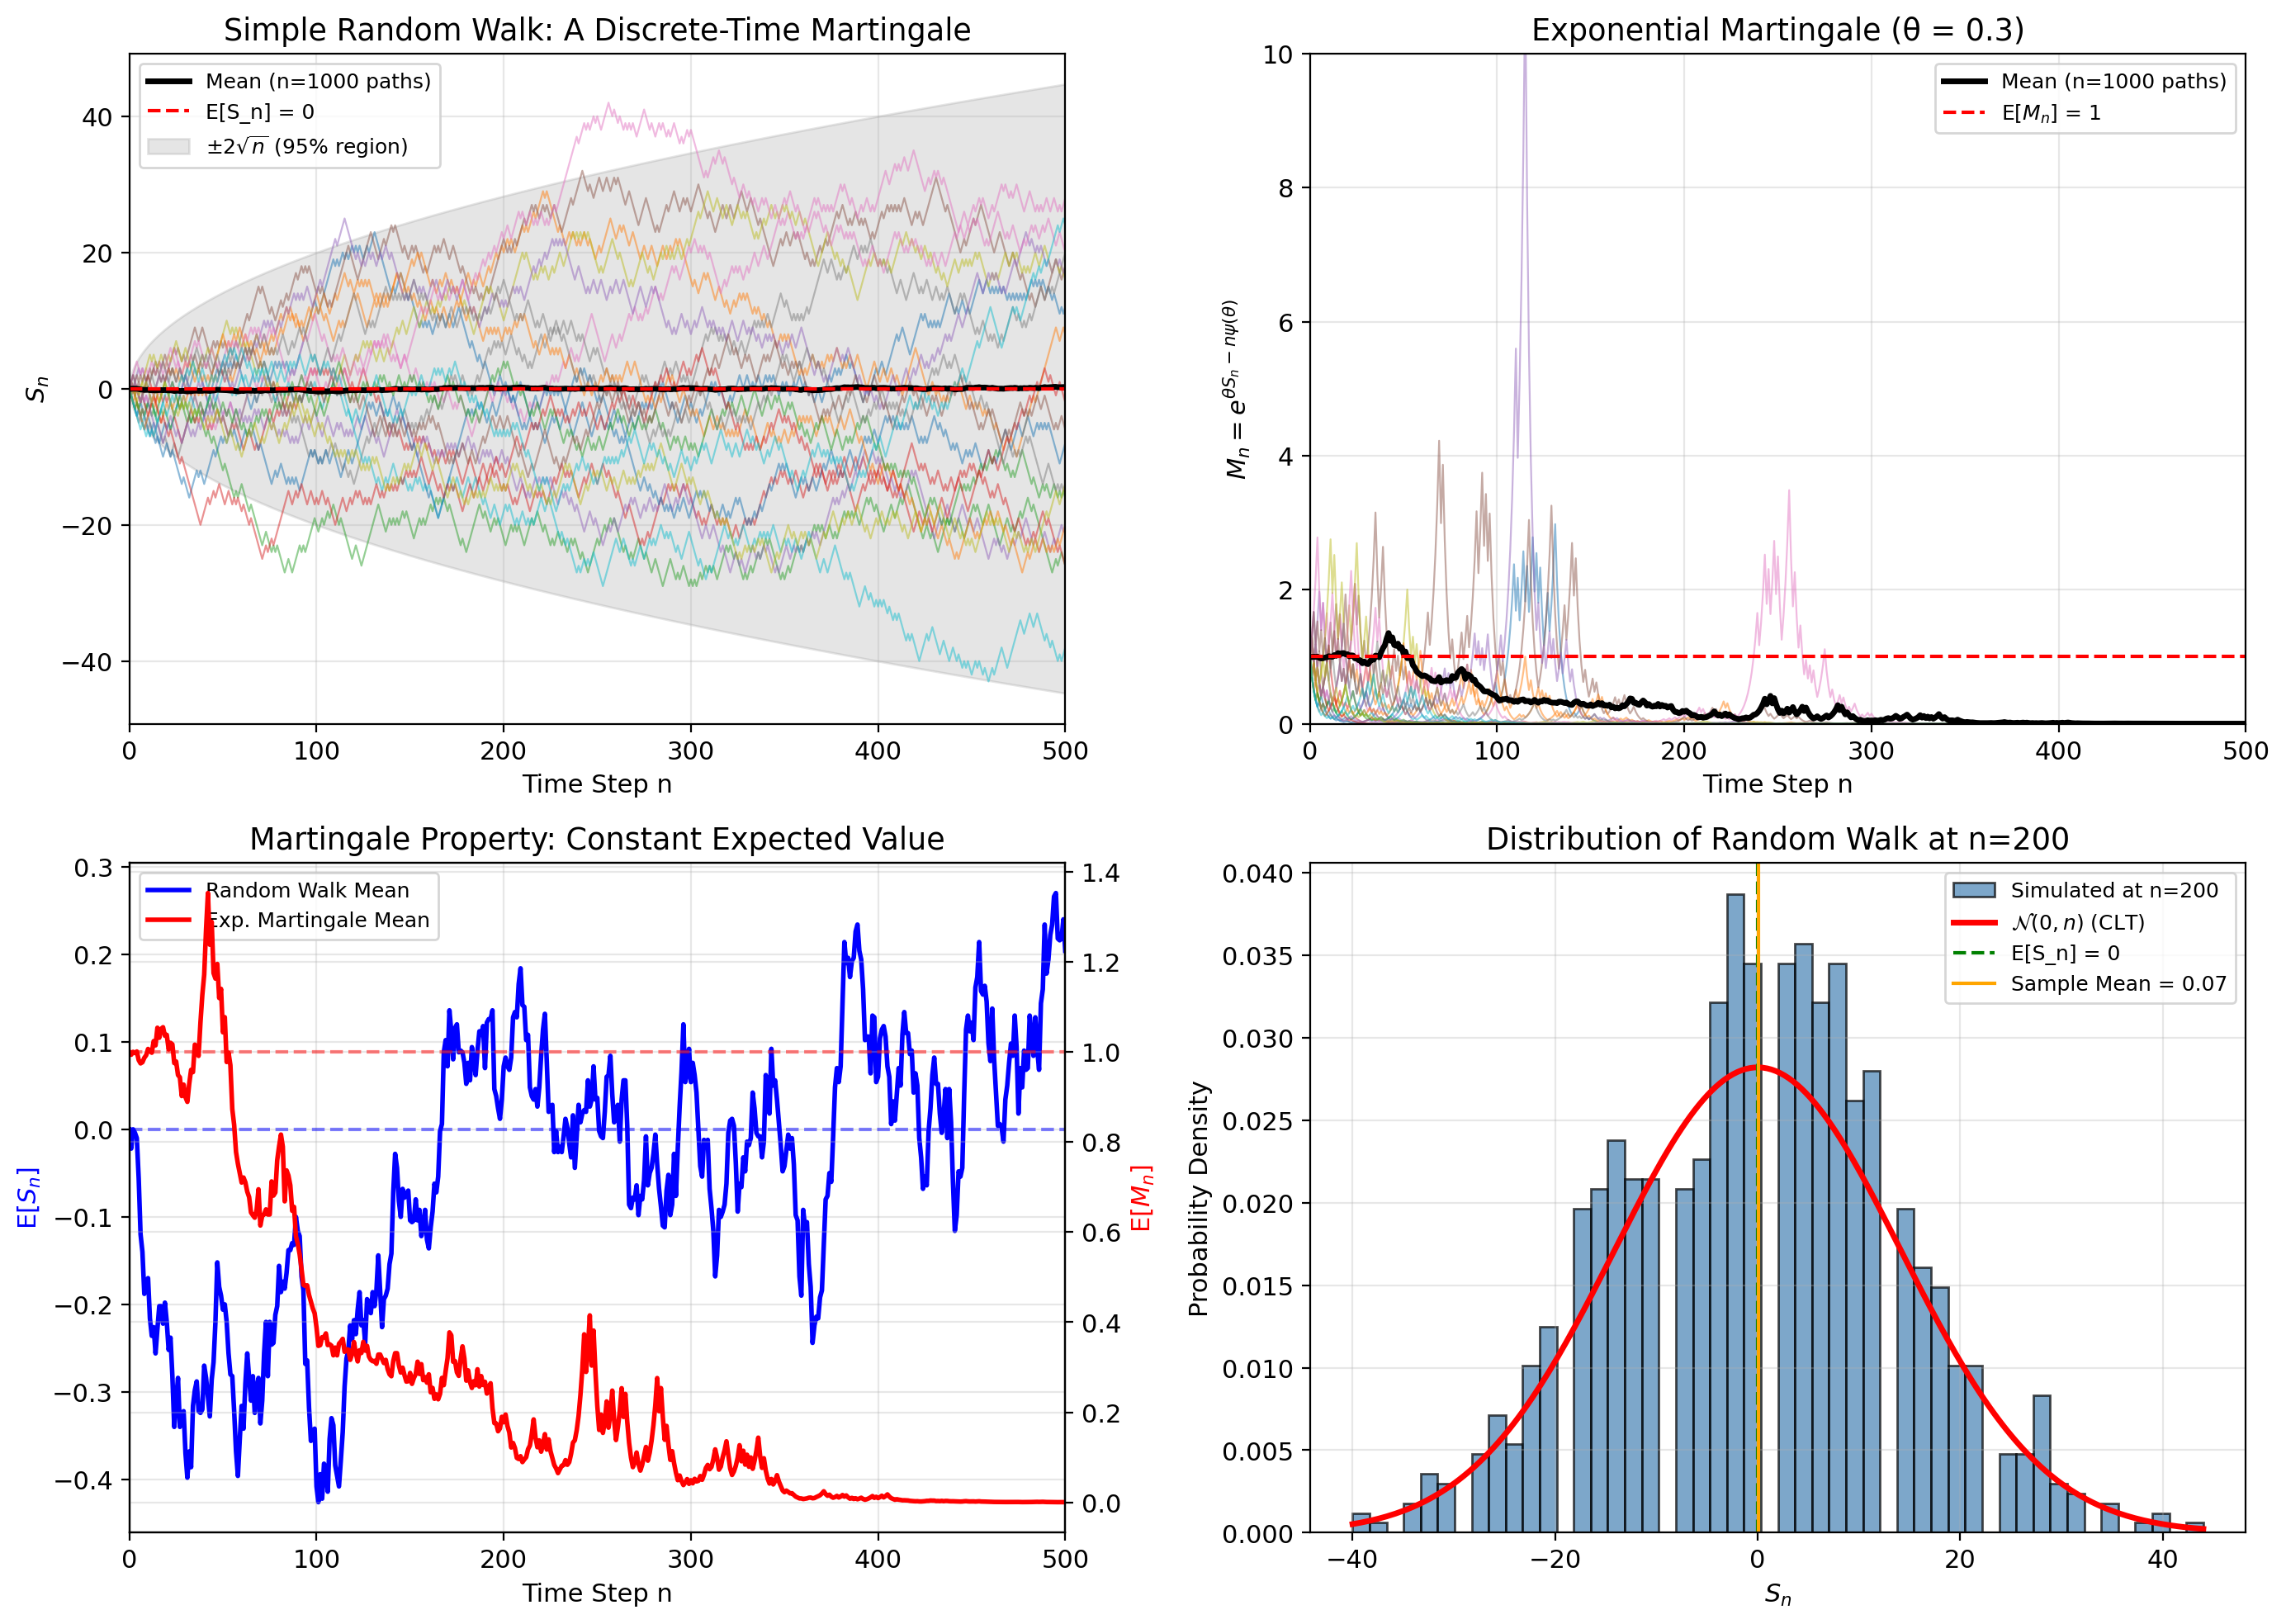


Plot saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time array
t = np.arange(n_steps + 1)

# ============================================================
# Panel 1: Simple Random Walk Sample Paths
# ============================================================
ax1 = axes[0, 0]
n_display = 20  # Number of paths to display

for i in range(n_display):
    ax1.plot(t, rw_paths[i, :], alpha=0.5, linewidth=0.8)

# Plot the mean path
mean_path = np.mean(rw_paths, axis=0)
ax1.plot(t, mean_path, 'k-', linewidth=2.5, label=f'Mean (n={n_paths} paths)')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='E[S_n] = 0')

# Theoretical standard deviation envelope: sqrt(n)
std_envelope = np.sqrt(t)
ax1.fill_between(t, -2*std_envelope, 2*std_envelope, alpha=0.2, color='gray',
                 label=r'$\pm 2\sqrt{n}$ (95% region)')

ax1.set_xlabel('Time Step n')
ax1.set_ylabel(r'$S_n$')
ax1.set_title('Simple Random Walk: A Discrete-Time Martingale')
ax1.legend(loc='upper left', fontsize=9)
ax1.set_xlim([0, n_steps])

# ============================================================
# Panel 2: Exponential Martingale Sample Paths
# ============================================================
ax2 = axes[0, 1]

for i in range(n_display):
    ax2.plot(t, exp_mart_paths[i, :], alpha=0.5, linewidth=0.8)

# Plot the mean
mean_exp_mart = np.mean(exp_mart_paths, axis=0)
ax2.plot(t, mean_exp_mart, 'k-', linewidth=2.5, label=f'Mean (n={n_paths} paths)')
ax2.axhline(y=1.0, color='red', linestyle='--', linewidth=1.5, label=r'E[$M_n$] = 1')

ax2.set_xlabel('Time Step n')
ax2.set_ylabel(r'$M_n = e^{\theta S_n - n\psi(\theta)}$')
ax2.set_title(f'Exponential Martingale (θ = {theta})')
ax2.legend(loc='upper right', fontsize=9)
ax2.set_xlim([0, n_steps])
ax2.set_ylim([0, 10])  # Limit y-axis for visibility

# ============================================================
# Panel 3: Martingale Property Verification
# ============================================================
ax3 = axes[1, 0]

# Compute running mean at each time step
running_mean_rw = np.mean(rw_paths, axis=0)
running_mean_exp = np.mean(exp_mart_paths, axis=0)

ax3.plot(t, running_mean_rw, 'b-', linewidth=2, label='Random Walk Mean')
ax3.axhline(y=0, color='blue', linestyle='--', alpha=0.5)

ax3_twin = ax3.twinx()
ax3_twin.plot(t, running_mean_exp, 'r-', linewidth=2, label='Exp. Martingale Mean')
ax3_twin.axhline(y=1, color='red', linestyle='--', alpha=0.5)

ax3.set_xlabel('Time Step n')
ax3.set_ylabel(r'E[$S_n$]', color='blue')
ax3_twin.set_ylabel(r'E[$M_n$]', color='red')
ax3.set_title('Martingale Property: Constant Expected Value')

# Combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=9)

ax3.set_xlim([0, n_steps])

# ============================================================
# Panel 4: Distribution at Fixed Time (Histogram)
# ============================================================
ax4 = axes[1, 1]

time_check = 200
rw_at_t = rw_paths[:, time_check]

# Histogram of random walk values
ax4.hist(rw_at_t, bins=50, density=True, alpha=0.7, color='steelblue',
         edgecolor='black', label=f'Simulated at n={time_check}')

# Theoretical distribution: N(0, n) by CLT
x_range = np.linspace(rw_at_t.min(), rw_at_t.max(), 200)
theoretical_pdf = stats.norm.pdf(x_range, loc=0, scale=np.sqrt(time_check))
ax4.plot(x_range, theoretical_pdf, 'r-', linewidth=2.5,
         label=r'$\mathcal{N}(0, n)$ (CLT)')

ax4.axvline(x=0, color='green', linestyle='--', linewidth=1.5, label='E[S_n] = 0')
ax4.axvline(x=np.mean(rw_at_t), color='orange', linestyle='-', linewidth=1.5,
            label=f'Sample Mean = {np.mean(rw_at_t):.2f}')

ax4.set_xlabel(r'$S_n$')
ax4.set_ylabel('Probability Density')
ax4.set_title(f'Distribution of Random Walk at n={time_check}')
ax4.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('martingales_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## 6. Optional Stopping Theorem Demonstration

We demonstrate Doob's Optional Stopping Theorem by simulating the random walk until it hits a boundary.

In [6]:
def random_walk_with_stopping(upper_bound, lower_bound, max_steps=10000, n_simulations=5000):
    """
    Simulate random walk with stopping at boundaries.
    Demonstrates the Optional Stopping Theorem: E[S_tau] = 0.
    
    Parameters:
    -----------
    upper_bound : int
        Upper stopping boundary
    lower_bound : int
        Lower stopping boundary (negative)
    max_steps : int
        Maximum number of steps before forced stopping
    n_simulations : int
        Number of independent simulations
    
    Returns:
    --------
    final_values : ndarray
        Values at stopping time
    stopping_times : ndarray
        Time at which each walk stopped
    """
    final_values = np.zeros(n_simulations)
    stopping_times = np.zeros(n_simulations)
    
    for i in range(n_simulations):
        position = 0
        for step in range(max_steps):
            increment = 2 * np.random.randint(0, 2) - 1
            position += increment
            
            if position >= upper_bound or position <= lower_bound:
                final_values[i] = position
                stopping_times[i] = step + 1
                break
        else:
            # Did not hit boundary within max_steps
            final_values[i] = position
            stopping_times[i] = max_steps
    
    return final_values, stopping_times


# Run simulation with symmetric boundaries
upper = 10
lower = -10
n_sims = 10000

final_vals, stop_times = random_walk_with_stopping(upper, lower, n_simulations=n_sims)

print(f"\n--- Optional Stopping Theorem Verification ---")
print(f"Boundaries: [{lower}, {upper}]")
print(f"Number of simulations: {n_sims}")
print(f"\nTheoretical E[S_τ] = 0 (for symmetric boundaries)")
print(f"Simulated E[S_τ] = {np.mean(final_vals):.4f}")
print(f"\nProbability of hitting upper bound: {np.mean(final_vals > 0):.4f}")
print(f"Probability of hitting lower bound: {np.mean(final_vals < 0):.4f}")
print(f"(Theoretical: 0.5 each for symmetric boundaries)")
print(f"\nMean stopping time: {np.mean(stop_times):.2f}")
print(f"(Theoretical E[τ] = |upper| × |lower| = {abs(upper) * abs(lower)})")


--- Optional Stopping Theorem Verification ---
Boundaries: [-10, 10]
Number of simulations: 10000

Theoretical E[S_τ] = 0 (for symmetric boundaries)
Simulated E[S_τ] = -0.1440

Probability of hitting upper bound: 0.4928
Probability of hitting lower bound: 0.5072
(Theoretical: 0.5 each for symmetric boundaries)

Mean stopping time: 100.71
(Theoretical E[τ] = |upper| × |lower| = 100)


## 7. Applications in Finance

Martingales are central to **mathematical finance**. Under the **risk-neutral measure**, discounted asset prices form martingales. This is the foundation of:

- **Black-Scholes option pricing**
- **No-arbitrage pricing theory**
- **Fundamental theorem of asset pricing**

The stock price under the risk-neutral measure satisfies:
$$\tilde{S}_t = e^{-rt}S_t$$

is a martingale, where $r$ is the risk-free rate.

## 8. Conclusion

Martingales provide a rigorous mathematical framework for "fair games" and conditional expectations. Key takeaways:

1. **Definition:** $E[X_{n+1} | \mathcal{F}_n] = X_n$ captures the notion that the best prediction is the current value
2. **Examples:** Random walks, exponential martingales, Doob's martingale
3. **Key theorems:** Optional stopping, convergence, maximal inequalities
4. **Applications:** Finance, gambling theory, sequential analysis

The simulations above confirm the theoretical properties:
- The expected value remains constant over time
- The Optional Stopping Theorem holds for bounded stopping times